In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = "citeseer"
paths=[
    fr"E:\projects\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_None\round_1\score_accuracy\split_auto_0_rest_10\xgbclass_10_2_0.csv",
    fr"E:\projects\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_None\round_0\score_accuracy\split_auto_0_rest_10\xgbclass_10_2_0.csv",
    fr"E:\projects\graph_description\snakemake_base\experiments\agg_train_per_class\{dataset}_None\round_2\score_accuracy\split_auto_0_rest_10\xgbclass_10_2_0.csv"
]

In [3]:
dfs = [pd.read_csv(path) for path in paths]
df = pd.concat(dfs, axis=0)
df = df.reset_index(drop=True)

In [4]:
df

,dataset,group,round,score_name,num_val,num_test,max_split_seed,n_estimators,max_depth,clf_seed,train_per_class,split_seed,path,value
0,citeseer,NaN,1,accuracy,0,rest,10,10,2,0,1,0,snakemake_base/scores/citeseer_None/round_1/sc...,0.075015
1,citeseer,NaN,1,accuracy,0,rest,10,10,2,0,1,1,snakemake_base/scores/citeseer_None/round_1/sc...,0.075015
2,citeseer,NaN,1,accuracy,0,rest,10,10,2,0,1,2,snakemake_base/scores/citeseer_None/round_1/sc...,0.075015
3,citeseer,NaN,1,accuracy,0,rest,10,10,2,0,1,3,snakemake_base/scores/citeseer_None/round_1/sc...,0.075015
4,citeseer,NaN,1,accuracy,0,rest,10,10,2,0,1,4,snakemake_base/scores/citeseer_None/round_1/sc...,0.075015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,citeseer,NaN,2,accuracy,0,rest,10,10,2,0,225,5,snakemake_base/scores/citeseer_None/round_2/sc...,0.689093
866,citeseer,NaN,2,accuracy,0,rest,10,10,2,0,225,6,snakemake_base/scores/citeseer_None/round_2/sc...,0.690622
867,citeseer,NaN,2,accuracy,0,rest,10,10,2,0,225,7,snakemake_base/scores/citeseer_None/round_2/sc...,0.695719
868,citeseer,NaN,2,accuracy,0,rest,10,10,2,0,225,8,snakemake_base/scores/citeseer_None/round_2/sc...,0.686035


In [5]:
df["split_seed"].unique(), df["clf_seed"].unique(), df["n_estimators"].unique()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([0], dtype=int64),
 array([10], dtype=int64))

In [6]:
#df = pd.read_csv(path)
df = df.drop(["group", "num_val", "num_test",  "clf_seed", "max_split_seed"],axis=1)

In [7]:
def extract_num_train_from_path(s):
    return int(s.split("split_")[1].split("/xgbclass")[0].split("_")[0])
def extract_split_id_from_path(s):
    return int(s.split("split_")[1].split("/xgbclass")[0].split("_")[3])

In [8]:
df["train_per_class"] = df["path"].map(extract_num_train_from_path)
df = df.drop(["path"],axis=1)

In [9]:
df.dtypes

dataset             object
round                int64
score_name          object
n_estimators         int64
max_depth            int64
train_per_class      int64
split_seed           int64
value              float64
dtype: object

In [10]:
#df[df["train_per_class"]==1]["path"][0].split("split_")[1].split("/xgbclass")[0].split("_")

In [11]:
#df[df["train_per_class"]==1]["path"][1].split("split_")[1].split("/xgbclass")[0].split("_")

In [12]:
import matplotlib.pyplot as plt

In [13]:
df

,dataset,round,score_name,n_estimators,max_depth,train_per_class,split_seed,value
0,citeseer,1,accuracy,10,2,1,0,0.075015
1,citeseer,1,accuracy,10,2,1,1,0.075015
2,citeseer,1,accuracy,10,2,1,2,0.075015
3,citeseer,1,accuracy,10,2,1,3,0.075015
4,citeseer,1,accuracy,10,2,1,4,0.075015
...,...,...,...,...,...,...,...,...
865,citeseer,2,accuracy,10,2,225,5,0.689093
866,citeseer,2,accuracy,10,2,225,6,0.690622
867,citeseer,2,accuracy,10,2,225,7,0.695719
868,citeseer,2,accuracy,10,2,225,8,0.686035


In [14]:
df_agg = df.drop("split_seed",axis=1).groupby(["dataset", "round", "score_name", "n_estimators", "max_depth", "train_per_class"]).agg(["mean", "std"]).reset_index()

In [15]:
df_agg

dataset round score_name n_estimators max_depth train_per_class  \
                                                                       
0   citeseer     0   accuracy           10         2               1   
1   citeseer     0   accuracy           10         2               2   
2   citeseer     0   accuracy           10         2               3   
3   citeseer     0   accuracy           10         2               4   
4   citeseer     0   accuracy           10         2               5   
..       ...   ...        ...          ...       ...             ...   
82  citeseer     2   accuracy           10         2             125   
83  citeseer     2   accuracy           10         2             150   
84  citeseer     2   accuracy           10         2             175   
85  citeseer     2   accuracy           10         2             200   
86  citeseer     2   accuracy           10         2             225   

       value            
        mean       std  
0   0.075015  0.000000  
1   0.216848  0.076170  
2   0.322222  0.033484  
3   0.358850  0.033453  
4   0.385771  0.044870  
..       ...       ...  
82  0.656596  0.014031  
83  0.664718  0.012302  
84  0.674580  0.009379  
85  0.678409  0.009951  
86  0.686340  0.010206  

[87 rows x 8 columns]

In [16]:
def my_dataset_iter(df, names):
    if len(names) == 0:
        yield (df,)
        return
    name = names[0]
    for value in df[name].unique():
        df_tmp = df[df[name]==value]
        for tpl in my_dataset_iter(df_tmp, names[1:]):
            yield (value,)+tpl

In [17]:
def my_plot(df, y_column):
    for dataset, metric, df1 in my_dataset_iter(df, ["dataset", "score_name"]):
        fig = plt.figure()
        for round, df2 in my_dataset_iter(df1, ["round"]):
            plt.title(dataset)
            plt.errorbar(df2["train_per_class"], df2[y_column]["mean"], yerr=df2[y_column]["std"], label=f"round {round}")
            plt.legend()
            plt.xlabel("num_train_per_class")
            plt.ylabel(metric)

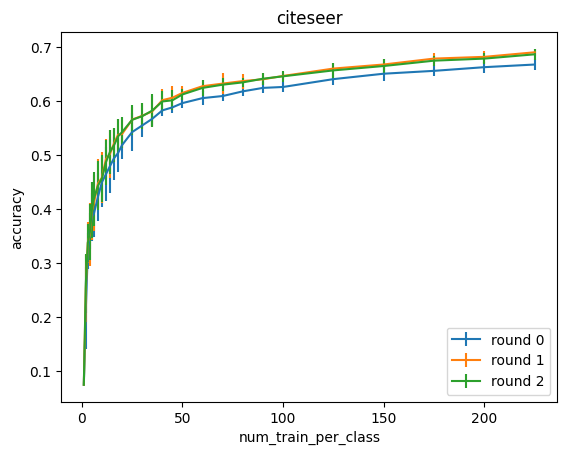

In [18]:
my_plot(df_agg, "value")

In [19]:
df_agg["value"]["mean"]

0     0.075015
1     0.216848
2     0.322222
3     0.358850
4     0.385771
        ...   
82    0.656596
83    0.664718
84    0.674580
85    0.678409
86    0.686340
Name: mean, Length: 87, dtype: float64